# LangChain and LangGraph

In [1]:
# pip install langchain langchain-core langchain-community langchain-experimental 
# pip install langchain-openai

### Chatmodels, Prompt Templates and Parsers

In [3]:
from langchain_openai import AzureChatOpenAI

model = AzureChatOpenAI(model='myllm')

# use it as an LLM -> pass a prompt
prompt = "Write a poem about the city Bangalore"
response = model.invoke(prompt)
print(response.content)

In the heart of the Deccan, where the gardens bloom bright,  
Bangalore, oh Bangalore, a city of light.  
With tech towers reaching, ambitions so tall,  
A blend of old echoes and the new city's call.  

Beneath the soft shadows of the ancient trees,  
Where laughter mingles with whispers of the breeze,  
The bustle of markets, the aromas that sway,  
From fragrant masalas to fresh flower displays.  

The hum of the traffic, a symphony played,  
On streets where the cycles and auto-rickshaws parade.  
Cafés and bistros, where stories are shared,  
In the city of dreams, where each heart is dared.  

From Lalbagh's green canvas, to Cubbon's embrace,  
The serenity flows through this vibrant space.  
A tapestry woven with culture's rich thread,  
In festivals cherished, where history’s led.  

The echoes of Kannada, the spices that dance,  
A fusion of flavors, a woven romance.  
Startups and scholars, unite in the fray,  
In a city where futures are sculpted each day.  

As twilight des

In [5]:
# use it as a chatmodel - pass a chatprompt

from langchain_core.messages import HumanMessage

message = [HumanMessage(content="Hi How are you?")]
model.invoke(message)


AIMessage(content="I'm just a computer program, but I'm here and ready to help you! How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 12, 'total_tokens': 35, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_7a53abb7a2', 'id': 'chatcmpl-Bf82wRxmgdfKsg2t5bSwuch8ylMbM', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 

In [6]:
# chat prompt template
from langchain_core.prompts import ChatPromptTemplate

system_prompt = "Translate the following into the language {language}"
prompt_temp = ChatPromptTemplate([("system",system_prompt),("user","{text}")])
prompt_temp

ChatPromptTemplate(input_variables=['language', 'text'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='Translate the following into the language {language}'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='{text}'), additional_kwargs={})])

In [7]:
prompt_temp.input_variables

['language', 'text']

In [10]:
myprompt = prompt_temp.invoke({"language":"French","text":"Hi How are you?"})
myprompt

ChatPromptValue(messages=[SystemMessage(content='Translate the following into the language French', additional_kwargs={}, response_metadata={}), HumanMessage(content='Hi How are you?', additional_kwargs={}, response_metadata={})])

In [11]:
op = model.invoke(myprompt)
op

AIMessage(content='Salut, comment ça va ?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 23, 'total_tokens': 30, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_7a53abb7a2', 'id': 'chatcmpl-Bf86DS2e9obNVlQTTD6JL0zWlqlaz', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual'

In [ ]:
from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()
parser.invoke(op)

'Salut, comment ça va ?'

## Automation using Chains: Automations / Automation Flows / Chains / Chain Workflows
- static workflows involving LLMs inbetween the steps, 
- the flow of data, steps are deterministic, decided by the developer/SME

**Example**

Language Translation Chain: input -----> [Prompt Templates >> LLM >> Parser ]----> Output

In [1]:
# chat prompt template
from langchain_core.prompts import ChatPromptTemplate
system_prompt = "Translate the following into the language {language}"
prompt_temp = ChatPromptTemplate([("system",system_prompt),("user","{text}")])


from langchain_openai import AzureChatOpenAI
model = AzureChatOpenAI(model='myllm')


from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()

In [3]:
# implement a chain using langchain
chain1 = prompt_temp | model | parser

chain1.invoke({"language":"telugu","text":"WHAT IS YOUR NAME?"})

'మీ పేరు ఏమిటి?'

In [4]:
def format_output(text):
    return {"Translation":text}

In [5]:
# implement a chain using langchain
chain1 = prompt_temp | model | parser | format_output

chain1.invoke({"language":"telugu","text":"WHAT IS YOUR NAME?"})

{'Translation': 'మీ పేరు ఏమిటి?'}

#### Code Chain

In [9]:
# Code generation chain
generate_prompt = ChatPromptTemplate([("system","Write a simple code for the task, only provide code no other additional text"),
                                      ("user","{task}")])

generation_chain = generate_prompt | model | parser

op = generation_chain.invoke("fibonacci series")
print(op)

```python
def fibonacci(n):
    fib_series = [0, 1]
    while len(fib_series) < n:
        fib_series.append(fib_series[-1] + fib_series[-2])
    return fib_series[:n]

# Example usage
n = 10
print(fibonacci(n))
```


In [11]:
analyze_prompt = ChatPromptTemplate([("system","Analyze the provided code, add docstrings and comments. only provide code no other additional text"),
                                      ("user","{code}")])

analyze_chain = analyze_prompt | model | parser
print(analyze_chain.invoke({"code":op}))

```python
def fibonacci(n):
    """
    Generate a Fibonacci series of length n.

    The Fibonacci series is a sequence of numbers where each number 
    is the sum of the two preceding ones, usually starting with 0 and 1.

    Parameters:
    n (int): The length of the Fibonacci series to generate.

    Returns:
    list: A list containing the first n numbers in the Fibonacci series.
    """
    # Initialize the Fibonacci series with the first two numbers
    fib_series = [0, 1]
    
    # Generate the Fibonacci series until it reaches the desired length n
    while len(fib_series) < n:
        # Append the sum of the last two numbers in the series
        fib_series.append(fib_series[-1] + fib_series[-2])
    
    # Return the series truncated to the first n numbers
    return fib_series[:n]

# Example usage
n = 10  # Set the desired length of the Fibonacci series
print(fibonacci(n))  # Output the first 10 numbers in the Fibonacci series
```


In [ ]:
def patch_inputs (code):
    return {"code":code}

final_chain = generation_chain | patch_inputs | analyze_chain
op = final_chain.invoke({"task":"fibonacci series"})
print(op)

In [14]:
final_chain = generate_prompt | model | parser | patch_inputs | analyze_prompt | model | parser
op = final_chain.invoke({"task":"fibonacci series"})
print(op)

```python
def fibonacci(n):
    """
    Generate a Fibonacci series of length n.

    Args:
        n (int): The number of elements in the Fibonacci series to generate.

    Returns:
        List[int]: A list containing the Fibonacci series up to n elements.
    """
    series = []  # Initialize an empty list to store Fibonacci numbers
    a, b = 0, 1  # Starting values for the Fibonacci sequence

    # Iterate n times to generate the desired number of Fibonacci numbers
    for _ in range(n):
        series.append(a)  # Add the current Fibonacci number to the list
        a, b = b, a + b  # Update a and b to the next Fibonacci numbers

    return series  # Return the completed Fibonacci series

n = 10  # Number of Fibonacci numbers to generate; can be changed for more or fewer elements
print(fibonacci(n))  # Print the generated Fibonacci series
```


### Tools with Langchain

In [15]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wiki = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(top_k_results=2))

wiki.invoke("Artificial Intelligence")

'Page: Artificial intelligence\nSummary: Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.\nHigh-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., ChatGPT and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into general appli

In [16]:
print(wiki.name)
print(wiki.description)
print(wiki.args)

wikipedia
A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.
{'query': {'description': 'query to look up on wikipedia', 'title': 'Query', 'type': 'string'}}


In [17]:
search_prompt = ChatPromptTemplate.from_template("generate a query to be searched on wikipedia for a given user inputs {input} . keep it short")

chain = search_prompt | model | parser | wiki | parser

chain.invoke({"input":"I am interested in world war II"})

'Page: Clate\nSummary: Clate (also known as Clett) is a hamlet and ward in southwestern Whalsay in the parish of Nesting in the Shetland Islands of Scotland.\n\nPage: Military budget of the United States\nSummary: The military budget of the United States is the largest portion of the discretionary federal budget allocated to the Department of Defense (DoD), or more broadly, the portion of the budget that goes to any military-related expenditures. The military budget pays the salaries, training, and health care of uniformed and civilian personnel, maintains arms, equipment and facilities, funds operations, and develops and buys new items. The budget funds six branches of the US military: the Army, Navy, Marine Corps, Coast Guard, Air Force, and Space Force.\n\n'

## Getting started with LangGraph

- compatiable with langchain tools: langchain, langsmith, langfuse, openai
- represent codes/functions/code_blocks as nodes and represent interactions as connections in graph



Key components

- Node: individual step/action (a function which makes llm call)
- Edges: connection between nodes, define the exection flow between nodes
- Graph: collection of nodes and edges, a complete structures
- State: a shared data structure followed by all nodes and connections ( a common schema)

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
# initiate a state

from typing import TypedDict

class myState(TypedDict):
    query:str
    response:str
    

In [4]:
# create a node

from langchain_openai import AzureChatOpenAI
from langchain.prompts import PromptTemplate

llm = AzureChatOpenAI(model='myllm')

# define a node: a node will alwaystake state (myState) as input and return state variables as output
def assistant(state:myState)->myState:
    prompt = PromptTemplate(input_variables=["query"],
                            template="Anwer the question in concise way {query}")
    
    response = llm.invoke(prompt.format(query=state['query'])).content
    return {"response":response}


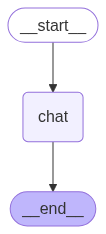

In [5]:
# build graph
from langgraph.graph import StateGraph,START,END

builder = StateGraph(myState)
builder.add_node("chat",assistant)
builder.add_edge(START,"chat")
builder.add_edge("chat",END)

graph = builder.compile()
graph

In [6]:
result = graph.invoke({"query":"What is capital of Canada?"})
print(result)

{'query': 'What is capital of Canada?', 'response': 'The capital of Canada is Ottawa.'}


In [7]:
print(result['response'])

The capital of Canada is Ottawa.


In [8]:
class myState(TypedDict):
    query:str
    response:str
    valid:bool

In [16]:
# adding an additional node: validting the input

# adding a node: checker which checks the input and validates based on certain rules
def checker(state:myState)->myState:
    if len(state['query'].strip())<10:
        return {"valid":False,"response":"ENTER A VALID QUESTION"}
    else:
        return {"valid":True}

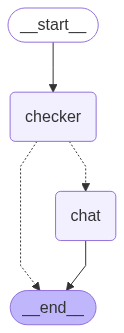

In [17]:
builder = StateGraph(myState)

builder.add_node("checker",checker)
builder.add_node("chat",assistant)

# add connection
builder.add_edge(START,"checker")


# add a conditional edge
def route(state:myState):
    if state['valid']:
        return "chat"
    else:
        return END
    
builder.add_conditional_edges("checker",route,{"chat":"chat",END:END})
builder.add_edge("chat",END)


graph = builder.compile()
graph

In [18]:
result = graph.invoke({"query":"what is capital of France?"})
print(result)

{'query': 'what is capital of France?', 'response': 'The capital of France is Paris.', 'valid': True}


In [19]:
result = graph.invoke({"query":"what ?       "})
print(result)

{'query': 'what ?       ', 'response': 'ENTER A VALID QUESTION', 'valid': False}
